In [0]:
# downlaod the necessary package
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import minmax_scale
from scipy.stats import pearsonr
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
import time
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import html

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (80.0.3987.87-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


# Indroduction
Data science, analytics, AI, big data are becoming widely used in many fields, that leads to the ever-increasing demand of data analysts, data scientists and other data professionals. Due to that, data science education is now a hot topic for educators and entrepreneurs. The objectives of this project are to redesign the curriculum of MIE1624: Intro to Data Science and Analytics and redesign a curriculum for a new “Master of Data Science and Artificial Intelligence” program at University of Toronto. The program will focus on both techinical and business skills. Lastly, we will design an online course delivery system that automatically adapts to learning patterns of an individual student and automatically adjusts a sequence of slides in online course for her/him.

# Part 1: Course curriculum design
In this part we will redesign the curriculum for MIE 1624

### 1.1 Use Web Scraping to Find the Most Demanded Programming Language for Data Science
Firstly, we want to figure out which programming language MIE1624 should base on. We use beautiful soup package to scrap the data science related jobs' information on Indeed Website. The algorithm used is to count the frequency of appearance of each programing languages. The web scraping code is adapted from Github sources. 

In [0]:
# The function used to scrap the Indeed website
def getlink(url):
    sum_py = 0
    sum_C = 0
    sum_Cplus = 0
    sum_java = 0
    sum_javascript = 0
    sum_r = 0
    sum_sql = 0
    sum_hadoop = 0
    sum_hive = 0
    sum_pig = 0
    sum_spark = 0
    sum_aws = 0 
    sum_tableau = 0

    i=0

    for i in range(10):   
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for i in all_matches:
            jd_url = 'http://www.indeed.com/m/'+i['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']}) ## find the structure like: <div id="desc"></>
            

            C = re.findall(r'[\b\s\/]C\b[\/\s,]', str(jd_desc))
            sum_C = sum_C + len(C)

            c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(jd_desc))
            sum_Cplus = sum_Cplus + len(c_plus)

            java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(jd_desc))
            sum_java = sum_java + len(java)

            javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(jd_desc))
            sum_javascript = sum_javascript + len(javascript)

            python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(jd_desc))
            sum_py = sum_py + len(python)

            R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(jd_desc))
            sum_r = sum_r + len(R)

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sum_sql = sum_sql + len(sql)

            hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(jd_desc))
            sum_hadoop = sum_hadoop + len(hadoop)

            hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(jd_desc))
            sum_hive = sum_hive + len(hive)

            pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(jd_desc))
            sum_pig = sum_pig + len(pig)

            spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(jd_desc))
            sum_spark = sum_spark + len(spark)

            aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(jd_desc))
            sum_aws = sum_aws + len(aws)

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            sum_tableau = sum_tableau + len(tableau)

        url_all = soup.findAll(attrs={'rel':['next']})
        #print(url_all)
        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    
    # make it into a dataframe
    df=pd.DataFrame({'language':["C","C++","Java","Java\nscript","Python","R","SQL","Hadoop","Hive","Pig",
                    "Spark","AWS","Tableau"],'count':[sum_C,sum_Cplus,sum_java,sum_javascript,sum_py,sum_r,sum_sql,sum_hadoop,sum_hive,
                 sum_pig,sum_spark,sum_aws,sum_tableau]})
    
    return df
    

We use the function to investigate the most popular programming language in major US cities. 

In [0]:
# Los Angeles
df_losangeles=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles%2C+CA')

In [0]:
# San Francisco
df_sanfrancisco=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=san+Francisco')

In [0]:
# new york
df_newyork=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=new+york')

In [0]:
# boston
df_boston=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=boston')

In [0]:
# Chicago
df_chicago=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=chicago')

In [0]:
# DC
df_dc=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=dc')

In [0]:
# Austin
df_austin=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=austin')

In [0]:
# San Jose
df_sanjose=getlink('https://www.indeed.com/m/jobs?q=data+scientist&l=san+jose')

Plot all the findings

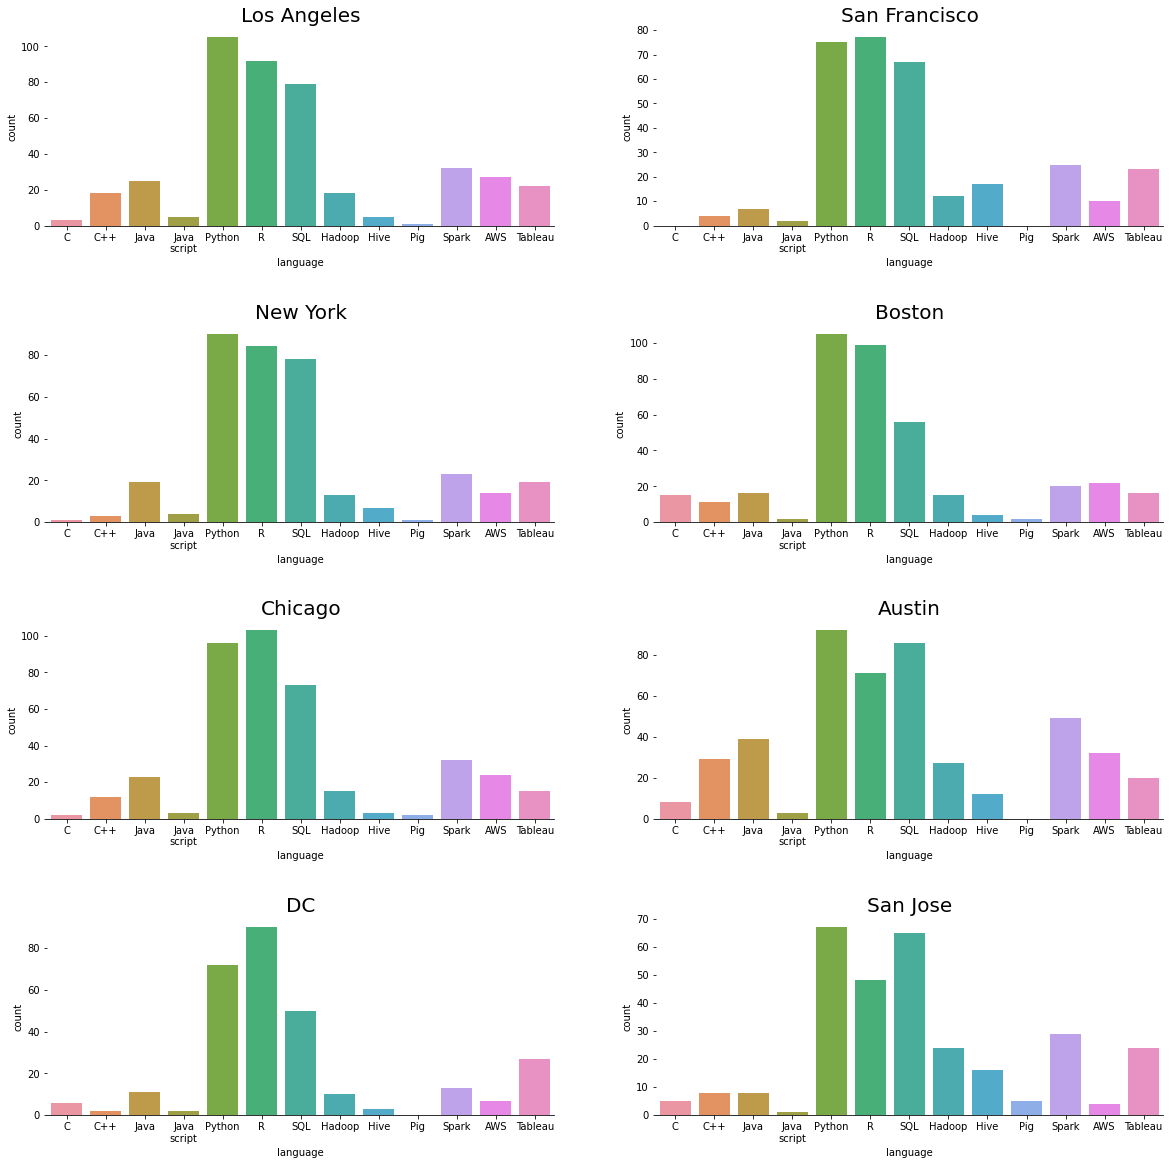

In [0]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
sns.despine(left=True)


sns.barplot(x='language', y='count', data=df_losangeles,ax=axes[0, 0]).set_title('Los Angeles',fontsize=20)
sns.barplot(x='language', y='count', data=df_sanfrancisco,ax=axes[0, 1]).set_title('San Francisco',fontsize=20)
sns.barplot(x='language', y='count', data=df_newyork,ax=axes[1, 0]).set_title('New York',fontsize=20)
sns.barplot(x='language', y='count', data=df_boston,ax=axes[1, 1]).set_title('Boston',fontsize=20)
sns.barplot(x='language', y='count', data=df_chicago,ax=axes[2, 0]).set_title('Chicago',fontsize=20)
sns.barplot(x='language', y='count', data=df_austin,ax=axes[2, 1]).set_title('Austin',fontsize=20)
sns.barplot(x='language', y='count', data=df_dc,ax=axes[3, 0]).set_title('DC',fontsize=20)
sns.barplot(x='language', y='count', data=df_sanjose,ax=axes[3, 1]).set_title('San Jose',fontsize=20)

# adjust the space
plt.subplots_adjust(hspace = 0.5)

### Conclusion
If we plot the summation of findings from all cities, we will see Python is the most popular programming language for data science. Hence, MIE1624 should be based on Python. However, SQL and R are also important, so we may include those courses in Part 2  Data Science program curriculum design. 

Text(0.5, 1.0, 'Total')

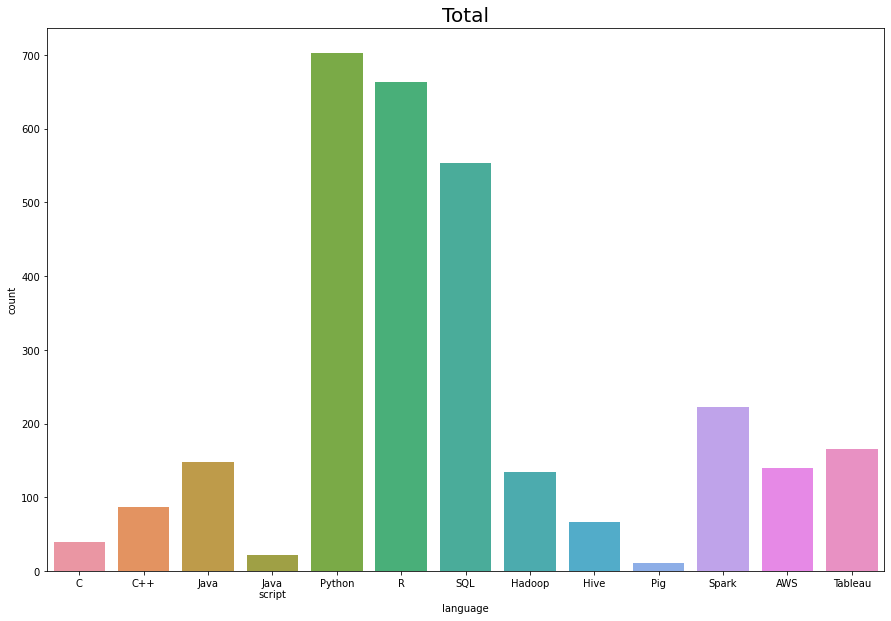

In [0]:
# Total
cities = [df_losangeles,df_sanfrancisco,df_newyork,df_boston,df_chicago,df_austin,df_dc,df_sanjose]
counts = np.zeros(13)
for city in cities:
  counts = counts + city.values[:,1]
total = pd.DataFrame({'language':df_dc.values[:,0],'count':counts})
plt.figure(figsize=(15,10))
sns.barplot(x='language', y='count', data=total).set_title('Total',fontsize=20)

### 1.2 Kaggle Survey Investigation
Besides scrapping Indeed website, we also use Kaggle Survey 2019 for our investigation. We exclude those who made extremely low salary and see what skills do the rest of people obtain. 

In [0]:
# Exclude low salary group
df=pd.read_csv("Kaggle_Salary.csv")
df=df.loc[df['Q10_Encoded']>2]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Locate North America only 
df1=df.loc[df['Q3']== 'Canada']
df2=df.loc[df['Q3']== 'United States of America']
df1=pd.concat([df1,df2],axis=0)

Proficiency in Machine Learning

Text(0.5, 0, 'count')

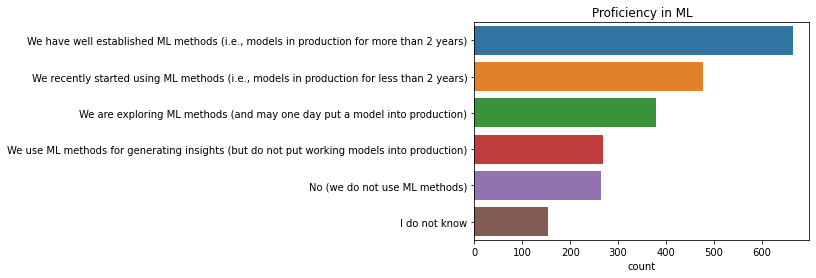

In [0]:
dfsub=pd.DataFrame(df1['Q8'].value_counts())
sns.barplot(x=dfsub['Q8'],y=dfsub.index.tolist())
plt.title("Proficiency in ML")
plt.xlabel("count")

Tools

Text(0.5, 0, 'count')

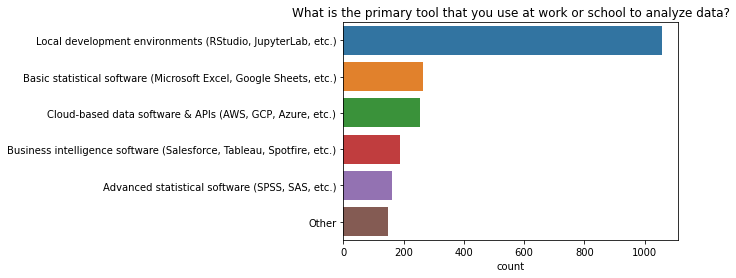

In [0]:
dfsub=pd.DataFrame(df1.iloc[:,48].value_counts())
sns.barplot(y=dfsub.index.tolist(),x=dfsub['Q14'])
plt.title("What is the primary tool that you use at work or school to analyze data?")
plt.xlabel("count")

Roles at Work

Text(0.5, 0, 'count')

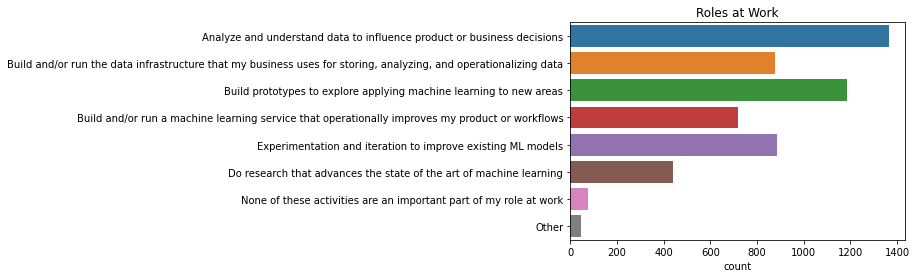

In [0]:
dfsub=df1.loc[:,['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8']]

namelist=['Analyze and understand data to influence product or business decisions','Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
'Build prototypes to explore applying machine learning to new areas','Build and/or run a machine learning service that operationally improves my product or workflows',
'Experimentation and iteration to improve existing ML models','Do research that advances the state of the art of machine learning','None of these activities are an important part of my role at work','Other']
numlist=[1366,877,1186,720,885,442,75,44]

sns.barplot(y=namelist,x=numlist)
plt.title("Roles at Work")
plt.xlabel("count")

#what we need to do at work?


IDE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

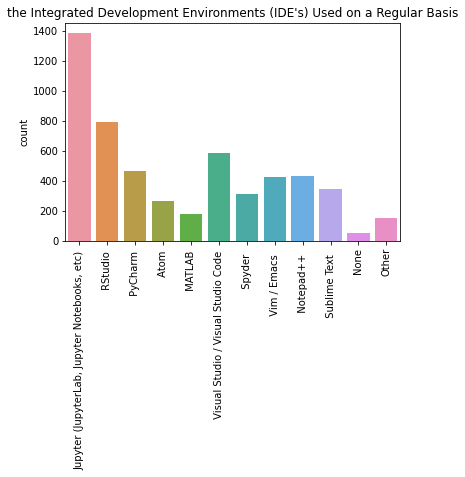

In [0]:
dfsub=df1.iloc[:,56:68]
dfsub=dfsub.fillna(0)
namelist=[]
numlist=[]
for i in dfsub.columns:
  for a in dfsub[i].unique().tolist():
    if a !=0:
      namelist.append(a)
      numlist.append(dfsub[i].tolist().count(a))
sns.barplot(x=namelist,y=numlist)
plt.title("the Integrated Development Environments (IDE's) Used on a Regular Basis")
plt.ylabel("count")
plt.xticks(rotation=90)

Programming Language

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

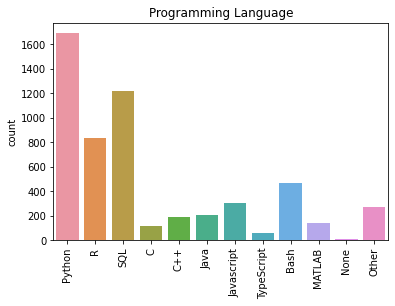

In [0]:
dfsub=df1.iloc[:,82:94]
dfsub=dfsub.fillna(0)
namelist=[]
numlist=[]
for i in dfsub.columns:
  for a in dfsub[i].unique().tolist():
    if a !=0:
      namelist.append(a)
      numlist.append(dfsub[i].tolist().count(a))

sns.barplot(x=namelist,y=numlist)
plt.title("Programming Language")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.xticks(rotation=90)

### Conclusion
Kaggle Survey also shows that Python is the most popular language, and Jupyter notebook is the most popular IDE. Most people working in data science have high proficiency in machine learning and most of them are applying data science to other area, especially business decisions. 

# Part 2:  Data Science program curriculum design
The "ds_general_skills_revised.cvs" file was found on Kaggle website. It's a dataset which contains the keywords frequency on several job finding websites. In this part we will do hierachical clustering on the keywords (skills) to help us designing the curriculum. 

In [0]:
df = pd.read_csv("ds_general_skills_revised.csv")

In [0]:
# Drop null, and drop index 16 which is 'total'
df = df.dropna()
df = df.drop(index=16)
df

,Keyword,LinkedIn,Indeed,SimplyHired,Monster
0,machine learning,"5,701","3,439","2,561","2,340"
1,analysis,"5,168","3,500","2,668","3,306"
2,statistics,"4,893","2,992","2,308","2,399"
3,computer science,"4,517","2,739","2,093","1,900"
4,communication,"3,404","2,344","1,791","2,053"
5,mathematics,"2,605","1,961","1,497","1,815"
6,computer vision,"1,879","1,413","1,153","1,207"
7,AI composite,"1,568","1,125",811,687
8,deep learning,"1,310",979,675,606
9,NLP composite,"1,212",910,660,582


In [0]:
# Merging and refining the keywords
def clean(x):
    if "," in str(x):
        a=x.split(",")
        joining=""
        x=joining.join(a)
    return(x)
for m in df.columns:
    for n in df.index:
        df.loc[n,m]=clean(df.loc[n,m])

x = df.iloc[:,1:].values

In [0]:
# Show the revised keywords
df
y = df.iloc[:,0].values
y

array(['machine learning', 'analysis', 'statistics', 'computer science',
       'communication', 'mathematics', 'computer vision', 'AI composite',
       'deep learning', 'NLP composite', 'software development',
       'neural networks', 'data engineering', 'project management',
       'software engineering', 'AI', 'artificial intelligence',
       'AI + artificial intelligence', 'NLP',
       'natural language processing', 'NLP + natural language processing'],
      dtype=object)

In [0]:
x1 = np.zeros(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x1[i,j] = int(x[i,j])

In [0]:
feature = df.columns

In [0]:
feature

Index(['Keyword', 'LinkedIn', 'Indeed', 'SimplyHired', 'Monster'], dtype='object')

In [0]:
df = pd.DataFrame(x1, columns=feature[1:])

In [0]:
# Keywords are dropped from the df and now represented by index numbers
df

,LinkedIn,Indeed,SimplyHired,Monster
0,5701.0,3439.0,2561.0,2340.0
1,5168.0,3500.0,2668.0,3306.0
2,4893.0,2992.0,2308.0,2399.0
3,4517.0,2739.0,2093.0,1900.0
4,3404.0,2344.0,1791.0,2053.0
5,2605.0,1961.0,1497.0,1815.0
6,1879.0,1413.0,1153.0,1207.0
7,1568.0,1125.0,811.0,687.0
8,1310.0,979.0,675.0,606.0
9,1212.0,910.0,660.0,582.0


In [0]:
df.loc[8,:] = df.loc[8,:] + df.loc[11,:]
df['label'] = y
df = df.drop(index=[11,7,9,10,14])
df

,LinkedIn,Indeed,SimplyHired,Monster,label
0,5701.0,3439.0,2561.0,2340.0,machine learning
1,5168.0,3500.0,2668.0,3306.0,analysis
2,4893.0,2992.0,2308.0,2399.0,statistics
3,4517.0,2739.0,2093.0,1900.0,computer science
4,3404.0,2344.0,1791.0,2053.0,communication
5,2605.0,1961.0,1497.0,1815.0,mathematics
6,1879.0,1413.0,1153.0,1207.0,computer vision
8,1981.0,1464.0,1096.0,911.0,deep learning
12,514.0,339.0,276.0,200.0,data engineering
13,476.0,397.0,330.0,348.0,project management


In [0]:
# Counts in different webstes
x = df.iloc[:,:-1].values
# Labels
y = df.iloc[:,-1].values

In [0]:
# Normalize x for dendrogram
x1 = (x-np.mean(x, axis=0))/np.std(x, axis=0)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

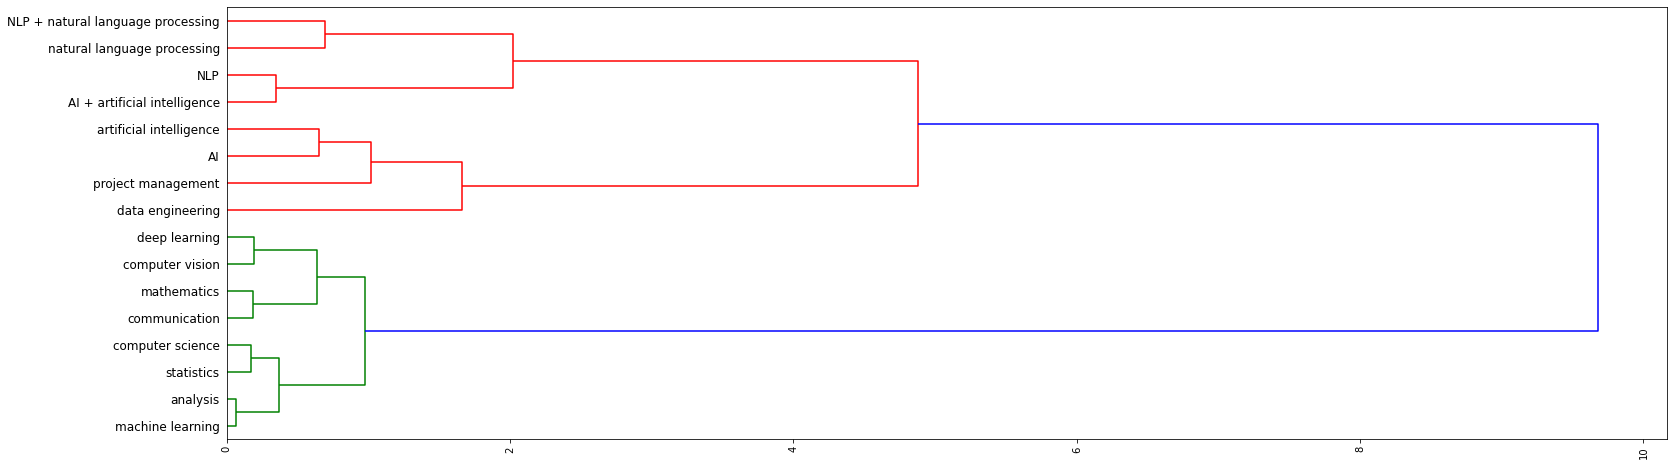

In [0]:
# Plot the dendrogram
fig = plt.figure(figsize=(50,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
endrogram = sch.dendrogram(sch.linkage(x1, method="ward"), orientation='right')
ax1.set_yticklabels(y)
plt.xticks(rotation=90)


### Conclusion
We will design our curriculum based on the dendrogram and findings in Part 1. The detailed designing can be found in the report. 

# Part 3 Visualizations of course curriculum

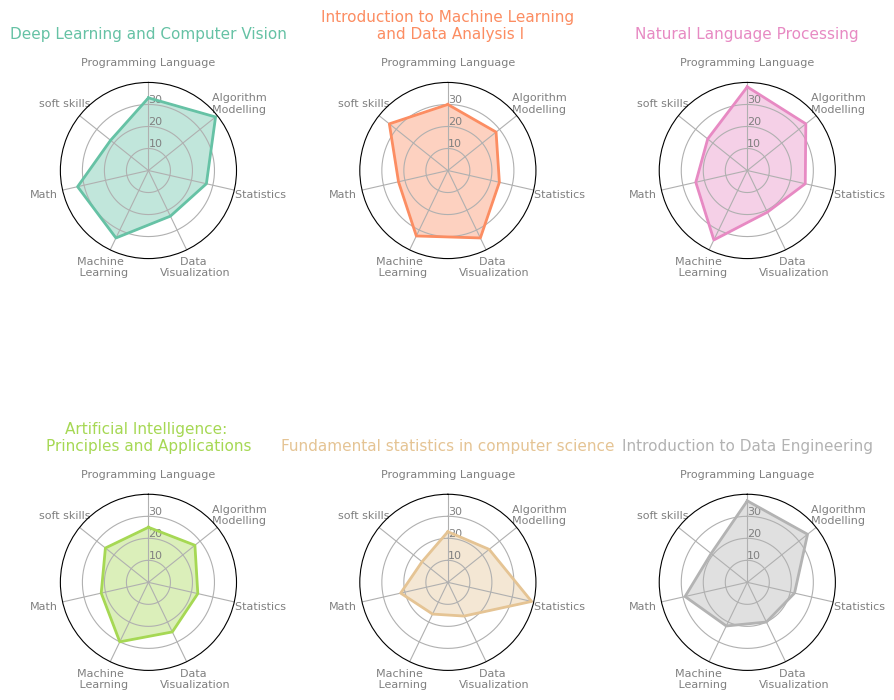

In [0]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Deep Learning and Computer Vision\n','Introduction to Machine Learning\n and Data Analysis I\n','Natural Language Processing\n','Artificial Intelligence: \nPrinciples and Applications\n','Fundamental statistics in computer science\n','Introduction to Data Engineering\n'],
'Programming Language': [33,30,38, 25,23,37],
'    Algorithm\n    Modelling': [39,28,34, 27,24,35],
'    Statistics': [27,24,27, 23,39,22],
'Data \nVisualization': [23,34,21, 25,17,20],
'Machine \n Learning':[34,33,35, 30,16,22],
'Math':[33,23,24, 22,22,29],
'soft skills': [22,34,23, 25,15,21]

})
'''
df = pd.DataFrame({
'group': [],
'var1': [],
'var2': [],
'var3': [],
'var4': [],
'var5': [],
'var6': [],
'var7': []

})
''' 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
  # number of variable
  categories = list(df)[1:]
  N = len(categories)
 
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
 
  # Initialise the spider plot
  plt.subplots_adjust(wspace=0.7)
  ax = plt.subplot(2,3,row+1, polar=True)
 
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
 
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='grey', size=8)
 
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([10,20,30], ["10","20","30"], color="grey", size=8)
  plt.ylim(0,40)
 
  # Ind1
  values=df.loc[row].drop('group').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
 
  # Add a title
  #title = "ABCD"
  plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title= df['group'][row], color=my_palette(row))
    
plt.show()

# Part 4 Online course delivery system 
In this part we will design an online course delivery system that automatically adapts to learning patterns of an individual student and automatically adjusts a sequence of slides in online course for her/him.

### 4.1 Web Scraping and Data Cleaning
"Result1.csv" is a file we found from online sources which is resulted from crawling Class Central website. It includes a course title and a paragraph of description for each courses. Firstly, we will clean the text of courses description. 

In [0]:
df=pd.read_csv("Result1.csv")

In [0]:
df.index=df['course']
df=df.drop(columns=['course'])
df.head()

,Unnamed: 0,description
course,,
Mathematics for Machine Learning: Linear Algebra,0,In this course on Linear Algebra we look at wh...
People Analytics,1,People analytics is a data-driven approach to ...
How to Code: Simple Data,2,This programming course takes a unique approac...
Bioinformatics: Introduction and Methods 生物信息学: 导论与方法,3,A big welcome to “Bioinformatics: Introduction...
Aplicaciones de la Teoría de Grafos a la Vida Real I,4,Este curso trata la Teoría de Grafos desde el ...


In [0]:
def clean_file_text(file):
    
    wordlist = []
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatiser = WordNetLemmatizer()
    stemmer = LancasterStemmer()
    


    for i in range(len(file)):
    # remove all URLs 
        new_file = re.sub(r"http\S+","", file[i])
    # remove html tags
        comp = re.compile('<.*?>')
        new_file = re.sub(comp, '', new_file)
    # replaced HTML characters with an ASCII equivalent
        new_file = html.unescape(new_file)
    
        new_file = re.sub('[^A-Za-z0-9 ]+', '', new_file)
        new_file = re.sub(r'[?|$|.|!|@|&]',r'',new_file)
        new_file = new_file.lower()

        
       
        wordlist.append(new_file)
 
    return wordlist

In [0]:
iiilist=df['description'].tolist()
for i in range(len(iiilist)):
  a=iiilist[i]
  a=str(a)
  iiilist[i]=a

In [0]:
df['cleantext']=clean_file_text(iiilist)

In [0]:
df.head()

,Unnamed: 0,description,cleantext
course,,,
Mathematics for Machine Learning: Linear Algebra,0,In this course on Linear Algebra we look at wh...,in this course on linear algebra we look at wh...
People Analytics,1,People analytics is a data-driven approach to ...,people analytics is a datadriven approach to m...
How to Code: Simple Data,2,This programming course takes a unique approac...,this programming course takes a unique approac...
Bioinformatics: Introduction and Methods 生物信息学: 导论与方法,3,A big welcome to “Bioinformatics: Introduction...,a big welcome to bioinformatics introduction a...
Aplicaciones de la Teoría de Grafos a la Vida Real I,4,Este curso trata la Teoría de Grafos desde el ...,este curso trata la teora de grafos desde el p...


### 4.2 Defininig Keywords and Find Keywords' Frequency
After cleaning the text, we will define a list of keywords which are topics related to data science and AI. We are going to obtain the frequency of each keyword in each course description. After that, we will store the values of frequencies in a matrix which rows are course titles and columns are keywords frequency. 

In [0]:
# Defining the key words
keyword=["machine learning", "deep learning","reinforcement learning","data science", "data analytics", "data engineer", "python" , " r " ," c "," nlp ","natural language processing","artificial intellegence"," ai ","programming","data mining", "finance","computer vision","statistics","supervised","unsupervised","linear algebra","jupyter","neural network","modeling", "encoding","encode","excel","math","management", "visualize","visualization", "sql", "statistical learning", "big data", "cloud computing", "database"]

In [0]:
dff = df.iloc[:,2]
dff[0]

'in this course on linear algebra we look at what linear algebra is and how it relates to vectors and matrices then we look through what vectors and matrices are and how to work with them including the knotty problem of eigenvalues and eigenvectors and how to use these to solve problems finally  we look at how to use these to do fun things with datasets  like how to rotate images of faces and how to extract eigenvectors to look at how the pagerank algorithm workssince were aiming at datadriven applications well be implementing some of these ideas in code not just on pencil and paper towards the end of the course youll write code blocks and encounter jupyter notebooks in python but dont worry these will be quite short focussed on the concepts and will guide you through if youve not coded beforeat the end of this course you will have an intuitive understanding of vectors and matrices that will help you bridge the gap into linear algebra problems and how to apply these concepts to machine

In [0]:
# The function to count the frequency
def countkeyword(x):
    countlist=[]    
    for i in keyword:
        countlist.append(x.count(i))
    return(countlist)

In [0]:
df['count']=0
countlist=[]
for k in range(df.shape[0]):
  countlist.append(countkeyword(str(df.iloc[k,-2])))

In [0]:
len(keyword)

36

In [0]:
# Make it into a matrix
dfnew=pd.DataFrame(np.array(countlist))
dfnew.columns=keyword
dfnew.index=df.index

machine learning [ 3  0  4 13  1  2  6  5  8 25  7 17 12 11  9 24 10 15 20 21]
deep learning [ 0  2  8  1  3 16  7  9]
reinforcement learning [0 8 2 4 1 3]
data science [ 1  0  5  3  2  4 10  8 17  7 13  6  9 19 11 21 12 34 14 26]
data analytics [0 1 3 2 9 4 5]
data engineer [0 1 5 3 6 2]
python [ 2  0  4  3  1  6  5 11 10 29  9  7 15 12 37 17 20 28  8 19 23]
 r  [ 0  2  1  4  6  3 21  5 12  8  9  7 13 22 14 11]
 c  [ 0  3  2  1  7  8 11  6]
 nlp  [0 2 1 4 3]
natural language processing [0 1 2 3]
artificial intellegence [0]
 ai  [ 0  2  1  7  3 37 10  6  5  4  9 16]
programming [ 0  5  1  7  3  9  2  4  6 12 10 19 23 18 16 11  8 13 15 14]
data mining [ 0  1  3  2  6  4  5  7 17  8]
finance [0 1 5 4 2]
computer vision [0 1 2 8]
statistics [ 0  2  1 12  4  3  5  6  8  9 10 11 15]
supervised [ 0  9 11  1  2  5  3  4  7]
unsupervised [0 5 2 1 3]
linear algebra [10  0  1  2  3  7  4  8]
jupyter [1 0 3 6 2 4]
neural network [0 1 4 5 3 2 8 9 6]
modeling [ 0  1  2  4  3  6 12  5 11  8]
encodin

In [0]:
dfnew.head()

,machine learning,deep learning,reinforcement learning,data science,data analytics,data engineer,python,r,c,nlp,ai,programming,data mining,finance,computer vision,statistics,supervised,unsupervised,linear algebra,jupyter,neural network,modeling,encoding,encode,excel,math,management,visualize,sql,statistical learning,big data,cloud computing,database,class
course,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mathematics for Machine Learning: Linear Algebra,3,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0,0,2,0,0,0,0,0,0,0,linear algebra
People Analytics,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,management
How to Code: Simple Data,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,programming
Bioinformatics: Introduction and Methods 生物信息学: 导论与方法,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,database
Programming for Data Science with Python,0,0,0,1,0,0,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,2,programming


In [0]:
#find all the feature is 0 and drop them 
dfnew.ix[(dfnew==0).all(axis=1), :]
dfnew=dfnew.ix[~(dfnew==0).all(axis=1), :] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-depr

In [0]:
# Merge similar keywords 
dfnew[' ai ']=dfnew[' ai ']+dfnew['artificial intellegence']
dfnew=dfnew.drop(columns=['artificial intellegence'])
dfnew[' nlp ']=dfnew[' nlp ']+dfnew['natural language processing']
dfnew=dfnew.drop(columns=['natural language processing'])
dfnew['visualize']=dfnew['visualize']+dfnew['visualization']
dfnew=dfnew.drop(columns=['visualization'])

In [0]:
dfnew['class']=dfnew.idxmax(axis=1)

In [0]:
dfnew['class'].unique().tolist()

['linear algebra',
 'management',
 'programming',
 'database',
 'big data',
 'data science',
 'math',
 'supervised',
 'machine learning',
 'statistics',
 'modeling',
 ' c ',
 ' r ',
 'neural network',
 'python',
 'excel',
 'reinforcement learning',
 'data analytics',
 'data mining',
 'visualize',
 ' ai ',
 'sql',
 'deep learning',
 'encoding',
 'finance',
 'cloud computing',
 ' nlp ',
 'data engineer',
 'encode',
 'jupyter']

In [0]:
# This is the final dataset we will use for the recommendation system
dfrecom=dfnew.iloc[:,:-1]
dfrecom.head()

,machine learning,deep learning,reinforcement learning,data science,data analytics,data engineer,python,r,c,nlp,ai,programming,data mining,finance,computer vision,statistics,supervised,unsupervised,linear algebra,jupyter,neural network,modeling,encoding,encode,excel,math,management,visualize,sql,statistical learning,big data,cloud computing,database
course,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mathematics for Machine Learning: Linear Algebra,3,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0,0,2,0,0,0,0,0,0,0
People Analytics,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
How to Code: Simple Data,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bioinformatics: Introduction and Methods 生物信息学: 导论与方法,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
Programming for Data Science with Python,0,0,0,1,0,0,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,2


In [0]:
# These are the topics available
topics = list(dfrecom.columns)
len(topics)

33

### 4.3 Use Pearson Coefficient of Correlation to Build the Recommendation System
Now, each course has a vector indicating the keywords frequency (as shown below). We need to scale the vector so that the maximum number is 1. We use min-max scaling instead of normalization because the vectors are very sparse. In our system, we will ask the student about his/her most interested topics from our topic list. We will assign '1' to the topics picked and 0 for the rest. Now, the "student" vector has the same length as "course" vector so that we can calculate the pearson coefficient of correlation between the student's preference and each course. The courses with top K pearson coefficients will be recommended to the students. 

In [0]:
np.array(dfrecom.iloc[0,:])

array([ 3,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 10,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0])

In [0]:
def recommend(x):
  perlist=[]
  for i in range(dfrecom.shape[0]):
    sample=minmax_scale(np.array(dfrecom.iloc[i,:]))
    per=pearsonr(x, sample)[0]
    perlist.append(per)
  return(perlist)

def course(perlist):
  df111=dfrecom.copy()
  df111['sorting']=perlist
  df111=df111.sort_values(by=['sorting'])
  k=df111.index.to_list()[-6:-1][::-1]
  return k

In [0]:
# A simle example which recommend 5 course for a student
student = [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
course(recommend(student))

['Deep Learning Essentials',
 'Launching into Machine Learning',
 'Advanced Machine Learning',
 'Introduction to Trading, Machine Learning & GCP',
 'Big Data Applications: Machine Learning at Scale']

### 4.4 Build a Mini User Interface
If we want to apply our recommendation system into business, we can't ask the student to enter an array of length 33. Therefore, we need to automatically transform the student's prefered topics to the vector. Furthermore, we can also allow the student to choose the number of  courses recommended. 

In [0]:
def UI (list_of_interest, num_courses):
  index_list = []
  for topic in list_of_interest:
    index_list.append(topics.index(topic))
  index_list
  student = np.zeros(33)
  for i in range(len(index_list)):
    student[index_list[i]] = 1
  def recommend(x):
    perlist=[]
    for i in range(dfrecom.shape[0]):
      sample=minmax_scale(np.array(dfrecom.iloc[i,:]))
      per=pearsonr(x, sample)[0]
      perlist.append(per)
    return(perlist)

  def course(perlist):
    df111=dfrecom.copy()
    df111['sorting']=perlist
    df111=df111.sort_values(by=['sorting'])
    k=df111.index.to_list()[-(num_courses+1):-1][::-1]
    return k
  return course(recommend(student))

In [0]:
topics

['machine learning',
 'deep learning',
 'reinforcement learning',
 'data science',
 'data analytics',
 'data engineer',
 'python',
 ' r ',
 ' c ',
 ' nlp ',
 ' ai ',
 'programming',
 'data mining',
 'finance',
 'computer vision',
 'statistics',
 'supervised',
 'unsupervised',
 'linear algebra',
 'jupyter',
 'neural network',
 'modeling',
 'encoding',
 'encode',
 'excel',
 'math',
 'management',
 'visualize',
 'sql',
 'statistical learning',
 'big data',
 'cloud computing',
 'database']

### Play with the UI
Choose 2 topics 10 courses


In [365]:
UI(#From the above topics, please enter what you are interested in (in the list format)

   ['statistics','machine learning'],

   #Please enter how many courses you want to take:

   10
   
   )

['Data Analysis for Social Scientists',
 'CS190.1x: Scalable Machine Learning',
 'Probabilistic Graphical Models 3: Learning',
 'Intro to Descriptive Statistics',
 'Serverless Machine Learning with Tensorflow on Google Cloud Platform',
 'Introduction to Machine Learning Course',
 'Data Analytics Foundations for Accountancy II',
 'Improving your statistical inferences',
 'Business Statistics, Data Analysis, and Decision Making: Part 2',
 'Statistical Analysis of fMRI Data']

Choose 3 topics and 15 courses

In [391]:
UI(#From the above topics, please enter what you are interested in (in the list format)

   ['data science','machine learning','python'],

   #Please enter how many courses you want to take:

   15
   
   )

['IBM Data Science',
 'SAP Data Intelligence for Enterprise AI',
 'Applied Social Network Analysis in Python',
 'Explorez vos données avec des algorithmes non supervisés',
 "Évaluez et améliorez les performances d'un modèle de machine learning",
 'Foundations of Data Science',
 'IBM Data Science',
 'Data Science and Machine Learning Capstone Project',
 'Data Science Interview Prep',
 'Developing Intelligent Apps and Bots',
 'Data Analysis and Interpretation',
 'Applied Data Science with Python',
 'How to Win a Data Science Competition: Learn from Top Kagglers',
 'Text Mining & Analytics',
 'Programming with Python for Data Science']

Choose 1 topic and 10 courses

In [351]:
UI(#From the above topics, please enter what you are interested in (in the list format)

   [' nlp '],

   #Please enter how many courses you want to take:

   10
   
   )

['Computational Social Science Capstone Project',
 'Clinical Natural Language Processing',
 'Data Science in Stratified Healthcare and Precision Medicine',
 'PLM14101: Global Information Technology Outlook',
 'Text Retrieval and Search Engines',
 'Introduction to Machine Learning',
 'Introduction to Machine Learning for Coders!',
 'Text Mining & Analytics',
 'Applied Text Mining in Python',
 'Clinical Data Science']

### Conclusion
From the above results, we can see our recommendation system (search engine) works very well. The returned courses are mostly related to the topics selected. There are 2 key features that make our system special. Firstly, we allow the users to choose multiple topics they are interested in and each recommended course is likely to cover all the topics. For example, if we search for "statistics" and "machine learning", the top ranked recommendation is "Data Analysis for social Scientist". The course topic doesn't seem like related but if we open the course website (https://www.classcentral.com/course/edx-data-analysis-for-social-scientists-6842) and read through the descriptions, we will find out it covers both machine learning and statistics. Similarly for "IBM Data Science" (https://www.classcentral.com/course/ibm-data-science-18394), it covers all of data science, python and machine learning. The second key feature is that our system does not make recommendations based on the course titles, but highly depend on the course descriptions. For example, if we enter "nlp", the returned courses will include like "Text Retrieval", "Text Mining", "Computational Social Science" and etc.